Accuracy (LogisticTorch): 0.795
Accuracy (Sklearn LogisticRegression): 0.850


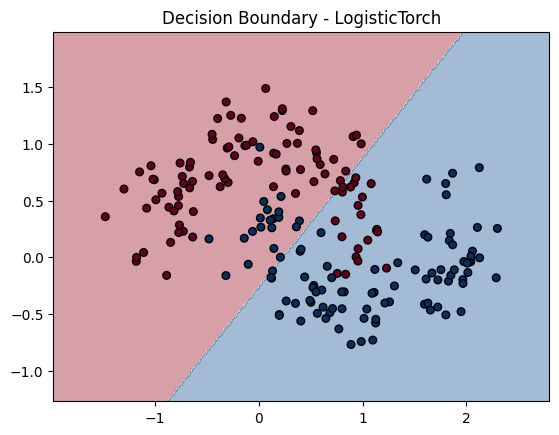

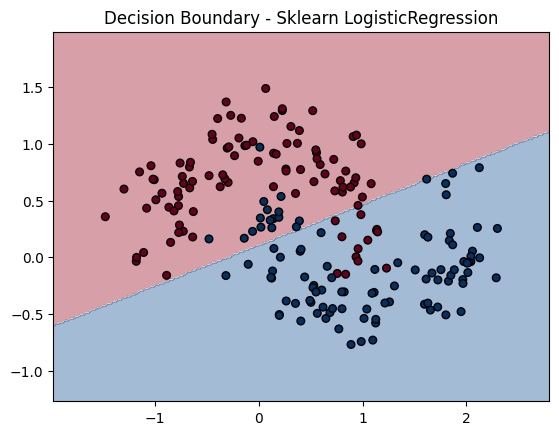

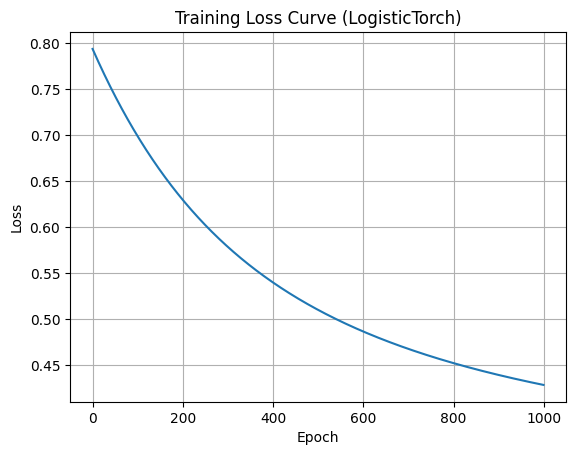

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.model = None
        self.losses = []

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        n_features = X.shape[1]
        self.model = nn.Linear(n_features, 1)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            self.losses.append(loss.item())

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            logits = self.model(X)
            probs = torch.sigmoid(logits).numpy()
        return np.hstack([1 - probs, probs])

    def predict(self, X):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= 0.5).astype(int)

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
torch_model = LogisticTorch(lr=0.01, epochs=1000)
torch_model.fit(X, y)

sk_model = LogisticRegression()
sk_model.fit(X, y)

y_pred_torch = torch_model.predict(X) #
y_pred_sk = sk_model.predict(X)

acc_torch = accuracy_score(y, y_pred_torch)
acc_sk = accuracy_score(y, y_pred_sk)

print(f"Accuracy (LogisticTorch): {acc_torch:.3f}")
print(f"Accuracy (Sklearn LogisticRegression): {acc_sk:.3f}")



def plot_decision_boundary(model, X, y, title, is_torch=True):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_torch:
        Z = model.predict(grid)
    else:
        Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(torch_model, X, y, "Decision Boundary - LogisticTorch", is_torch=True)
plot_decision_boundary(sk_model, X, y, "Decision Boundary - Sklearn LogisticRegression", is_torch=False)

plt.plot(torch_model.losses)
plt.title("Training Loss Curve (LogisticTorch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
